<a href="https://colab.research.google.com/github/mismatchgit/PyTorch-tutorial-freecodecamp/blob/main/Pytorch_workflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow

In [3]:
import torch
from torch import nn #building blocks of pytorch
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.6.0+cu124'

## Data Preparing and loading

In [4]:
#linear regression
w=0.7
b=0.3

#create
start=0
end=1
step=0.01
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = (w*X) + b

X[:10], y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]),
 100,
 100)

## Splitting the Dta into train, validation, test

In [5]:
#create a train test split
train_split = int(.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test), len(y_train)

(20, 80)

### Visualization

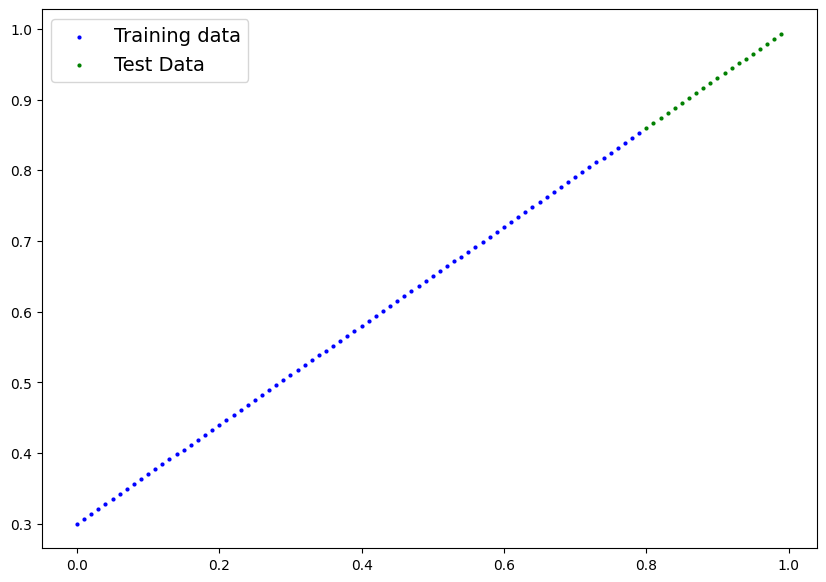

In [6]:
def plot_prediction(train_data =X_train,
                       train_labels=y_train,
                       test_data=X_test,
                       test_labels=y_test,
                       predictions=None):

  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test Data")

  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size":14});
plot_prediction();

## Building first model

In [11]:
# create linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    #initialize model parameters
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad= True,
                                        dtype=torch.float32))

    #Same thing can be easily doen with PyTorch linear layer also
    # Use nn.Linear() for creating the model parameters
    #self.linear_layer = nn.Linear(in_features=1,
                                  #out_features=1)
    #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the input
    return self.weight * x + self.bias #linear regression output.  If pytorch linear layer was used it would be self.linear_layer(x)

### Pytorch Model Building essentials

https://www.learnpytorch.io/01_pytorch_workflow/#pytorch-model-building-essentialsMM

### checking the contents of the Model

In [13]:
#create a random seed
torch.manual_seed(42)

#create and istance of the model
model_0 = LinearRegressionModel()

#check out the params
model_0.parameters

#check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
#list the named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making prediction

In [15]:
#using torch.inference_mode()
with torch.inference_mode():
  y_preds = model_0(X_test)

# Note: in older PyTorch code it might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [16]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 20
Number of predictions made: 20
Predicted values:
tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621]])


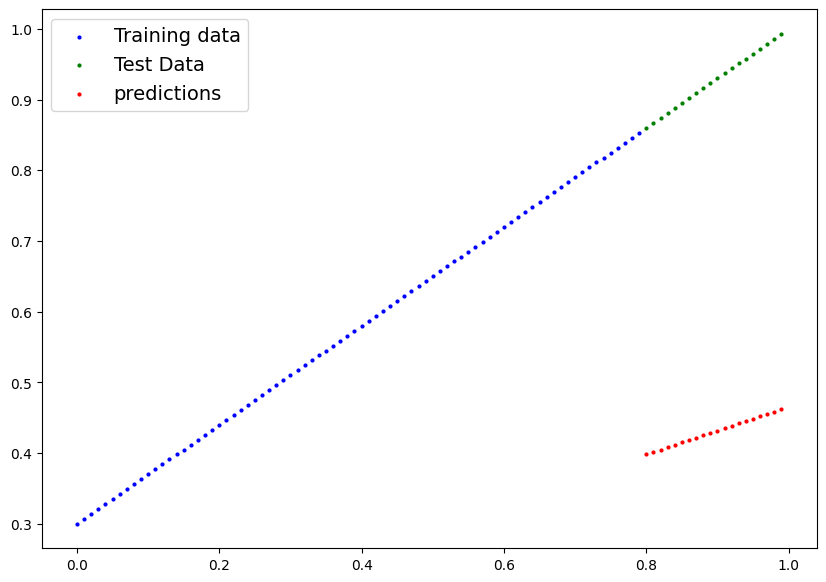

In [18]:
plot_prediction(predictions=y_preds)

## Train the model

### Creating a loss function and optimizer in PyTorch

In [19]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))




## creating a training loop (and testing loop).

In [20]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31469792127609253 | MAE Test Loss: 0.48281747102737427 
Epoch: 10 | MAE Train Loss: 0.19909533858299255 | MAE Test Loss: 0.3474648892879486 
Epoch: 20 | MAE Train Loss: 0.08958515524864197 | MAE Test Loss: 0.21752354502677917 
Epoch: 30 | MAE Train Loss: 0.05288771912455559 | MAE Test Loss: 0.1439102590084076 
Epoch: 40 | MAE Train Loss: 0.045192889869213104 | MAE Test Loss: 0.11271438747644424 
Epoch: 50 | MAE Train Loss: 0.04140976816415787 | MAE Test Loss: 0.09821617603302002 
Epoch: 60 | MAE Train Loss: 0.03795855492353439 | MAE Test Loss: 0.0888485461473465 
Epoch: 70 | MAE Train Loss: 0.034532517194747925 | MAE Test Loss: 0.08085694909095764 
Epoch: 80 | MAE Train Loss: 0.03110707364976406 | MAE Test Loss: 0.07252134382724762 
Epoch: 90 | MAE Train Loss: 0.027681414037942886 | MAE Test Loss: 0.06452975422143936 


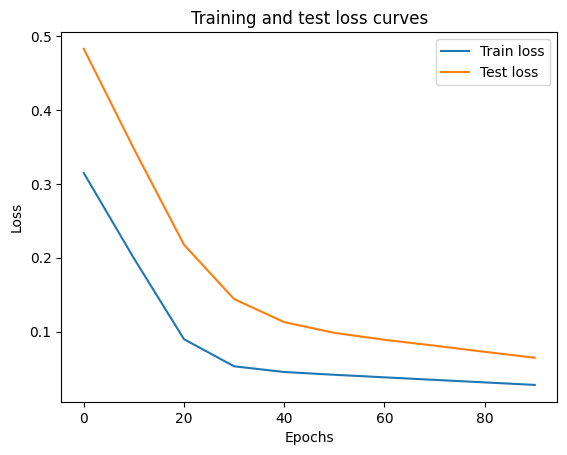

In [21]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [23]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {w}, bias: {b}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([0.5792])), ('bias', tensor([0.3508]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


### Making predictions with a trained PyTorch model (inference)

In [24]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8142],
        [0.8200],
        [0.8258],
        [0.8315],
        [0.8373],
        [0.8431],
        [0.8489],
        [0.8547],
        [0.8605],
        [0.8663],
        [0.8721],
        [0.8779],
        [0.8837],
        [0.8895],
        [0.8953],
        [0.9011],
        [0.9068],
        [0.9126],
        [0.9184],
        [0.9242]])

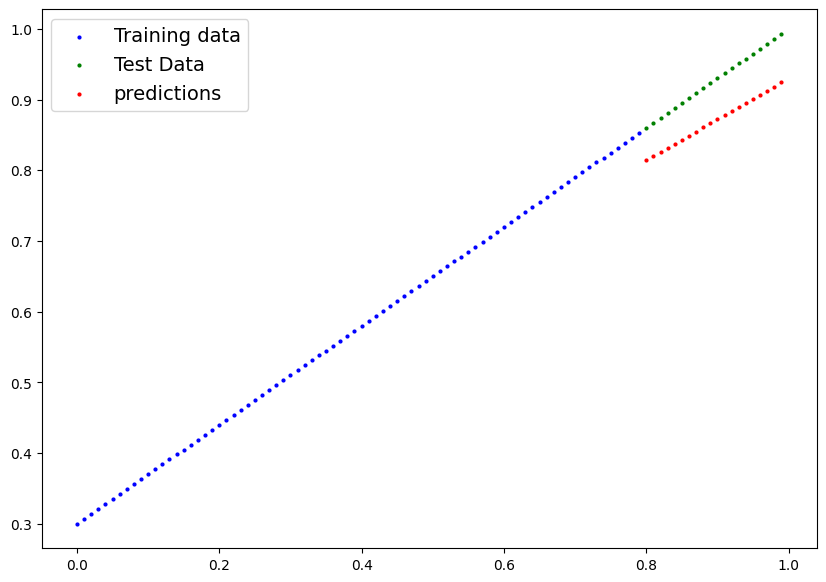

In [25]:
plot_prediction(predictions=y_preds)

## Saving and loading a PyTorch model
`The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().`

In [26]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [27]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 May  3 04:34 models/01_pytorch_workflow_model_0.pth


## Loading a saved PyTorch model's state_dict()

In [28]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
#loaded_model_0.to(device)

<All keys matched successfully>

In [29]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model


In [30]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])